In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Fitting polynomials


In [2]:
# Generate a fake dataset with Gaussian noise
x=np.linspace(-5.0,7.0)
y=x*np.sin(0.25*x)+0.1*np.random.normal(0.0,1.0,len(x))
sy=0.1*np.ones_like(y)

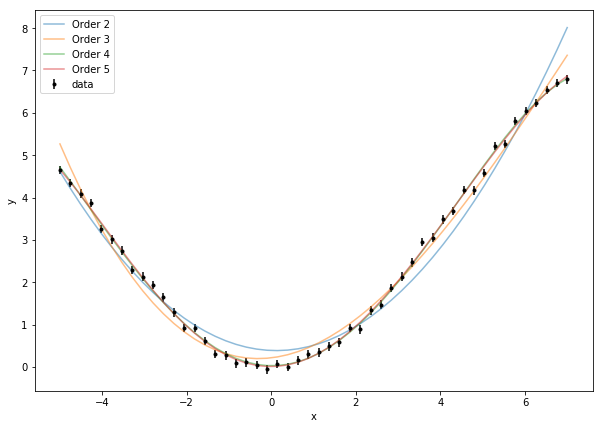

In [3]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Fit data with polynomials of different orders (and plot)
for i in np.arange(2,6):
    # Fit 
    p=np.polyfit(x,y,i)
    plt.plot(x,np.polyval(p,x),alpha=0.5,label='Order %d'%i)

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Least-squares fitting

In [4]:
import scipy.optimize

In [5]:
# Define a model
def model(x,a):
    return a[0]*np.cos(a[1]*x)+a[2]*x+a[3]

In [6]:
# Define a residual function
def residual(a,x,y,sy):
    ym=model(x,a)
    return (y-ym)/sy

In [7]:
# Parameter estimation
a=[-3.0,0.5,0.0,3.0]

In [8]:
# Fit the function and compute parameter uncertainties
q,cov_q,infodict,mesg,ier=scipy.optimize.leastsq(residual,a,args=(x,y,sy),full_output=1)
sq=np.sqrt(np.diag(cov_q*np.var(residual(q,x,y,sy))))

In [9]:
# Print parameters
for i in range(len(q)):
    print("%d %g +- %g"%(i,q[i],sq[i]))

0 -3.76189 +- 0.0777675
1 0.364411 +- 0.00600789
2 -0.00156676 +- 0.00468651
3 3.76925 +- 0.0867011


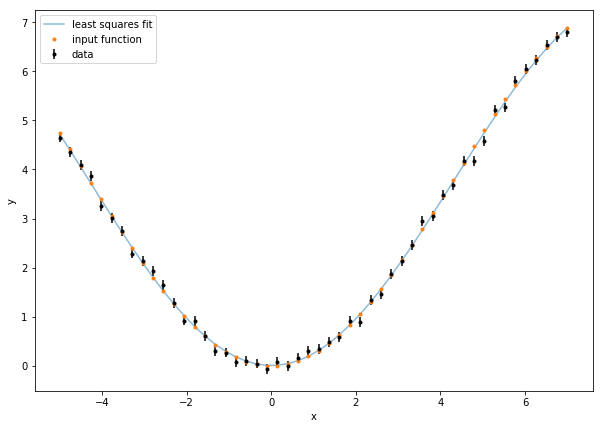

In [10]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Plot model
plt.plot(x,model(x,q),alpha=0.5,label='least squares fit')

# Plot original function
plt.plot(x,x*np.sin(0.25*x),'.',label='input function')

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# curve_fit

In [11]:
# Define a model
def func(x,a,b,c,d):
    return a*np.cos(b*x)+c*x+d

In [12]:
# Fit
p,pcov=scipy.optimize.curve_fit(func,x,y,q,sy)
sp=np.sqrt(np.diag(pcov))

In [13]:
# Print parameters
for i in range(len(p)):
    print("%d %g +- %g"%(i,p[i],sp[i]))

0 -3.76189 +- 0.0810783
1 0.364411 +- 0.00626366
2 -0.00156679 +- 0.00488603
3 3.76925 +- 0.0903922


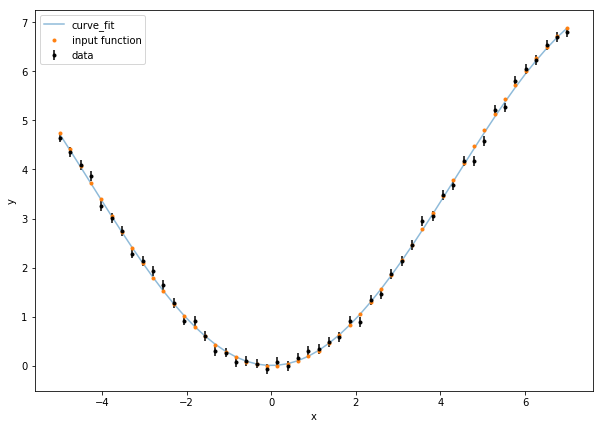

In [14]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Plot model
plt.plot(x,func(x,*p),alpha=0.5,label='curve_fit')

# Plot original function
plt.plot(x,x*np.sin(0.25*x),'.',label='input function')

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# curve_fit with arguments

In [15]:
# Define a model
def func(z,*a):
    x=z[0]
    y=z[1]
    return y*a[0]*np.cos(a[1]*x)+a[2]*x+a[3]

In [16]:
# Fit
p,pcov=scipy.optimize.curve_fit(func,(x,2.0),y,q,sy)
sp=np.sqrt(np.diag(pcov))

In [17]:
# Print parameters
for i in range(len(p)):
    print("%d %g +- %g"%(i,p[i],sp[i]))

0 -1.88095 +- 0.0405392
1 0.364411 +- 0.00626367
2 -0.00156676 +- 0.00488603
3 3.76925 +- 0.0903922


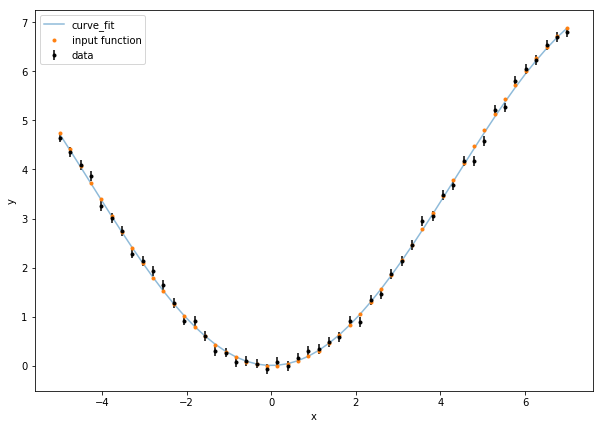

In [18]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Plot model
plt.plot(x,func((x,2.0),*p),alpha=0.5,label='curve_fit')

# Plot original function
plt.plot(x,x*np.sin(0.25*x),'.',label='input function')

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()